In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Tensorflow code for loading in data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing pixel values from 0-255 to 0-1 and converting to float32
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape, X_test.shape)
print('We want to combine the 2nd and third dimensions to get 28*28, for our input space of the neural network.')

# Reshaping the 28x28 images into a 784-dimensional vector
X_train = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (10000, 28, 28)
We want to combine the 2nd and third dimensions to get 28*28, for our input space of the neural network.
(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,))

# Define the encoder part: a dense layer with 32 units and ReLU activation
encoded = Dense(units=32, activation='relu')(input_img)

# Define the decoder part: a dense layer with 784 units and sigmoid activation
decoded = Dense(units=784, activation='sigmoid')(encoded)

# Create the full autoencoder model
autoencoder = Model(input_img, decoded)

# Create the encoder-only model
encoder = Model(input_img, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the autoencoder model's architecture
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
autoencoder.fit(X_train,
                X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0085 - loss: 0.3869 - val_accuracy: 0.0103 - val_loss: 0.1881
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0111 - loss: 0.1797 - val_accuracy: 0.0117 - val_loss: 0.1545
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0097 - loss: 0.1502 - val_accuracy: 0.0116 - val_loss: 0.1338
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0105 - loss: 0.1314 - val_accuracy: 0.0103 - val_loss: 0.1207
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0097 - loss: 0.1195 - val_accuracy: 0.0112 - val_loss: 0.1121
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0107 - loss: 0.1118 - val_accuracy: 0.0129 - val_loss: 0.1061
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0117 - loss: 0.1063 - val_accuracy: 0.0130 - val_loss: 0.1021
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0114 - loss: 0.1027 - 

KeyboardInterrupt: 

In [5]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


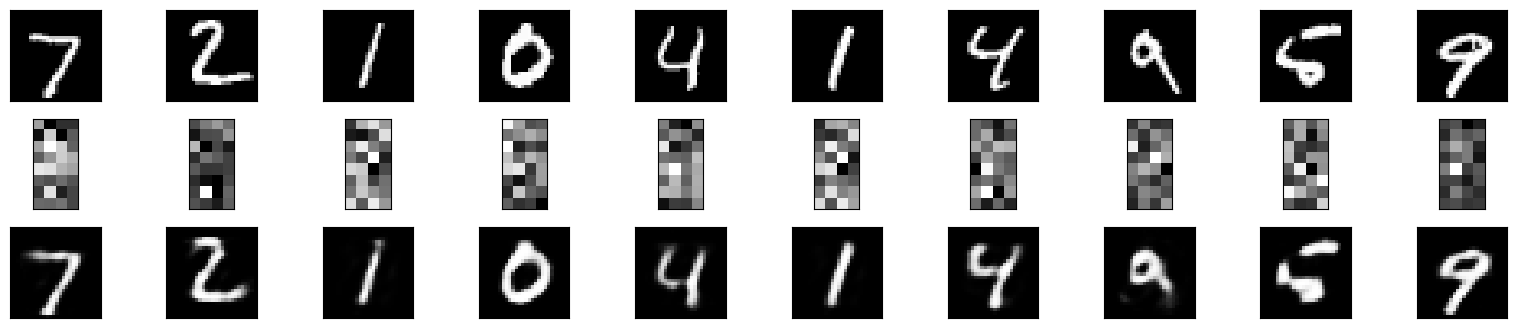

In [7]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()






